# Tutorial 1: Deep stimulus design with flyvis

## Learning objectives
In this tutorial, you will learn to:
- Load and work with pretrained neural network models of the fly visual system
- Find optimal naturalistic stimuli that maximally excite specific neurons
- Generate artificial optimal stimuli using gradient-based optimization
- Compare different types of optimal stimuli and their effects

## Introduction

Understanding what makes a neuron respond strongly is fundamental to neuroscience. In this tutorial, we'll explore how to find and generate stimuli that maximally excite specific neurons in computational models of the fly visual system.

**Model Ensembles**: The FlyVis framework includes ensembles of neural network models - multiple independently trained models of the fly visual system. Each model in the ensemble captures slightly different aspects of neural computation due to different initial conditions, training trajectories, or architectural variations. Working with ensembles allows us to:
- Test the robustness of findings across multiple models
- Identify stimuli that reveal differences between models
- Understand which neural responses are consistent vs. variable across the population

We'll work with three types of optimal stimuli:
1. **Optimal naturalistic stimuli** - Finding the best stimulus from a dataset of natural scenes
2. **Regularized optimal stimuli** - Simplifying naturalistic stimuli while preserving responses
3. **Artificial optimal stimuli** - Generating stimuli from scratch using gradients

These techniques become particularly powerful when applied across model ensembles, as demonstrated in the project ideas at the end of this tutorial.

## Setup

First, let's import the necessary libraries and set up our environment:

In [1]:
# For Google Colab, uncomment and run this cell to install FlyVis
# !pip install git+https://github.com/TuragaLab/flysim_tutorials.git

In [2]:
# Run this to download the pretrained model ensemble
# !flyvis download-pretrained

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# FlyVis imports
from flyvis import NetworkView
from flyvis.datasets.sintel import AugmentedSintel
from flyvis.analysis.optimal_stimuli import (
    FindOptimalStimuli,
    GenerateOptimalStimuli,
    plot_stim_response,
)

# Set up plotting
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300

## Part 1: Loading data and models

Let's start by loading a dataset of naturalistic stimuli and a pretrained network model:

In [4]:
# Load the dataset of naturalistic stimuli (from the Sintel movie)
dataset = AugmentedSintel(tasks=["lum"], temporal_split=True)

# Load a pretrained network model from the ensemble
# The identifier "flow/0000/000" specifies: task/ensemble_id/network_id
# - "flow": the training task (optic flow prediction)
# - "0000": the first ensemble (collection of models trained with same configuration)
# - "000": the first network within that ensemble
network_view = NetworkView("flow/0000/000")

print(f"Dataset contains {len(dataset)} stimulus sequences")
print(f"Network model loaded successfully")

[2025-06-19 11:49:33] sintel_utils:331 Found Sintel at /home/lappalainenj@hhmi.org/flysim_tutorials/.venv/lib/python3.13/site-packages/flyvis/data/SintelDataSet


[2025-06-19 11:49:34] network_view:122 Initialized network view at /home/lappalainenj@hhmi.org/flysim_tutorials/.venv/lib/python3.13/site-packages/flyvis/data/results/flow/0000/000


Dataset contains 2268 stimulus sequences
Network model loaded successfully


### Understanding the network architecture

The network models the fly visual system, including different cell types. Let's explore what cell types are available:

In [5]:
# Get information about the network structure
connectome = network_view.connectome
cell_types = connectome.unique_cell_types

print("Available cell types:")
for i, cell_type in enumerate(cell_types):
    print(f"{i+1:2d}. {cell_type}")

Available cell types:
 1. b'R1'
 2. b'R2'
 3. b'R3'
 4. b'R4'
 5. b'R5'
 6. b'R6'
 7. b'R7'
 8. b'R8'
 9. b'L1'
10. b'L2'
11. b'L3'
12. b'L4'
13. b'L5'
14. b'Lawf1'
15. b'Lawf2'
16. b'Am'
17. b'C2'
18. b'C3'
19. b'CT1(Lo1)'
20. b'CT1(M10)'
21. b'Mi1'
22. b'Mi2'
23. b'Mi3'
24. b'Mi4'
25. b'Mi9'
26. b'Mi10'
27. b'Mi11'
28. b'Mi12'
29. b'Mi13'
30. b'Mi14'
31. b'Mi15'
32. b'T1'
33. b'T2'
34. b'T2a'
35. b'T3'
36. b'T4a'
37. b'T4b'
38. b'T4c'
39. b'T4d'
40. b'T5a'
41. b'T5b'
42. b'T5c'
43. b'T5d'
44. b'Tm1'
45. b'Tm2'
46. b'Tm3'
47. b'Tm4'
48. b'Tm5Y'
49. b'Tm5a'
50. b'Tm5b'
51. b'Tm5c'
52. b'Tm9'
53. b'Tm16'
54. b'Tm20'
55. b'Tm28'
56. b'Tm30'
57. b'TmY3'
58. b'TmY4'
59. b'TmY5a'
60. b'TmY9'
61. b'TmY10'
62. b'TmY13'
63. b'TmY14'
64. b'TmY15'
65. b'TmY18'


## Part 2: Finding optimal naturalistic stimuli

Let's find the stimulus from our dataset that maximally excites a T4c neuron. T4c neurons are direction-selective and should respond strongly to upward-moving ON edges.

In [6]:
# Create an object to find optimal stimuli
findoptstim = FindOptimalStimuli(network_view, dataset)

# For the T4c neuron, we expect that the maximally excitatory stimulus 
# should contain an ON-edge moving upward
target_cell_type = "T4c"
print(f"Finding optimal stimulus for {target_cell_type} neuron...")

[2025-06-19 11:49:35] logging_utils:23 epe not in /home/lappalainenj@hhmi.org/flysim_tutorials/.venv/lib/python3.13/site-packages/flyvis/data/results/flow/0000/000/validation, but 'loss' is. Falling back to 'loss'. You can rerun the ensemble validation to make appropriate recordings of the losses.


[2025-06-19 11:49:40] network:222 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2025-06-19 11:49:40] chkpt_utils:36 Recovered network state.


Finding optimal stimulus for T4c neuron...


/home/lappalainenj@hhmi.org/flysim_tutorials/.venv/lib/python3.13/site-packages/flyvis/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_optimal_stimulus_responses/b6529468e179f0460c6c916f0050c989/output.h5


Text(0.5, 0.8, 'Optimal Naturalistic Stimulus for T4c')

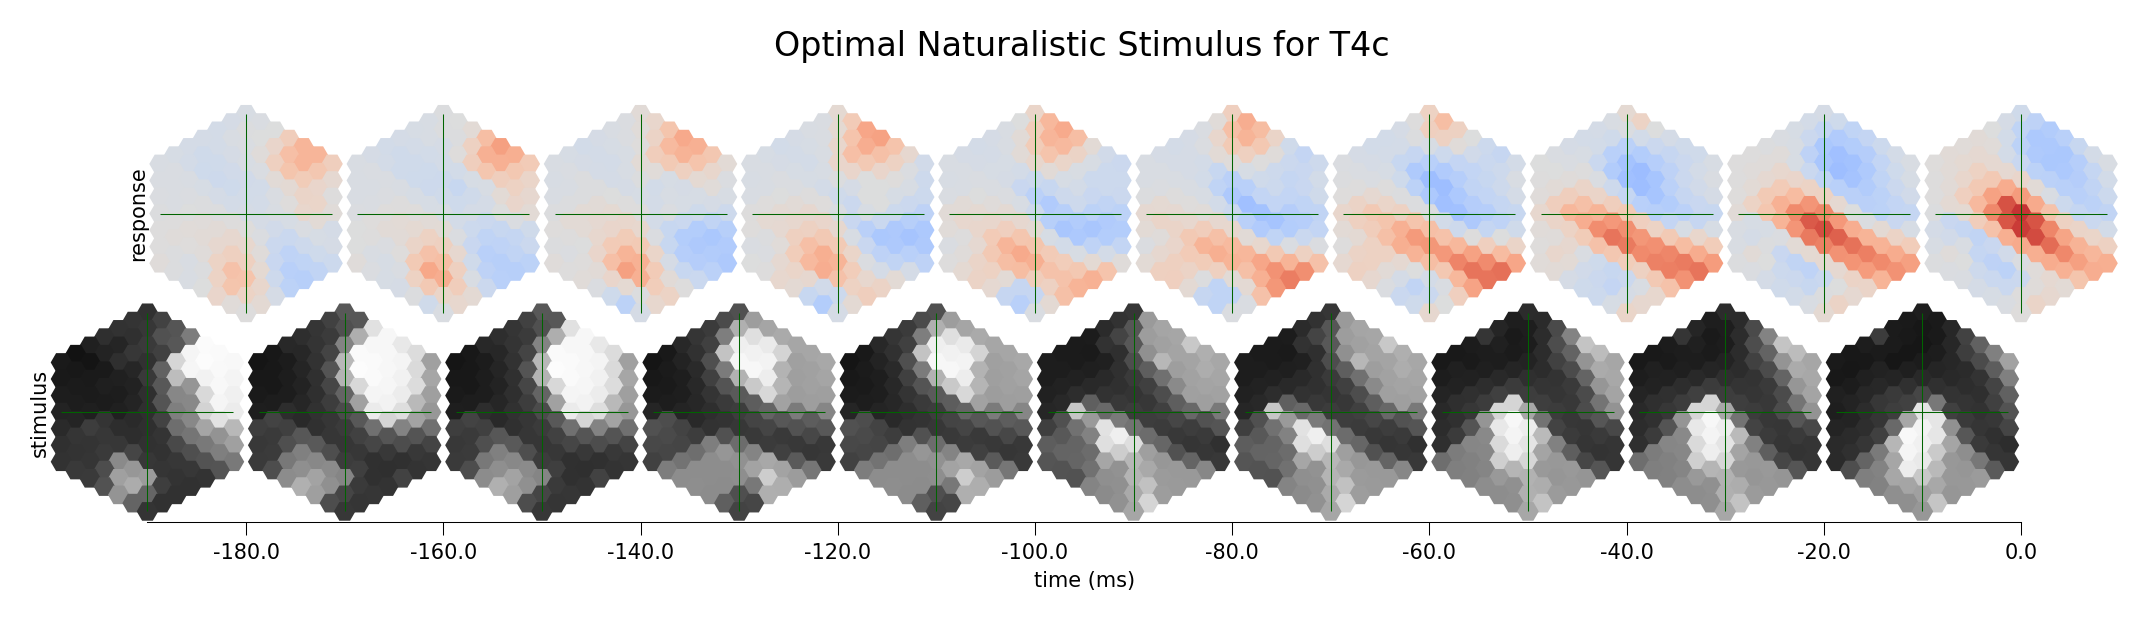

In [7]:
# Find the optimal stimulus responses
optstim = network_view.optimal_stimulus_responses(target_cell_type)

# Plot the optimal naturalistic stimulus and the response it evokes
stim_resp_plot = plot_stim_response(
    optstim.stimulus.stimulus,
    optstim.stimulus.response,
    1 / 100,  # dt = 1/100 seconds
    *network_view.connectome_view.get_uv(target_cell_type),
    figsize=[8, 3],
    label_peak_response=True,
)

plt.suptitle(f"Optimal Naturalistic Stimulus for {target_cell_type}", fontsize=8, y=0.8)

### 🤔 Discussion Questions

1. Does the optimal stimulus contain the expected ON-edge moving upward?
2. What other visual features do you notice in the stimulus?
3. When does the T4c neuron respond most strongly during the stimulus sequence?

## Part 3: Regularized optimal stimuli

The naturalistic stimulus contains many visual features. 

Using the differentiable model, the previous function already found a simpler version that maintains the same neural response but removes unnecessary details:

Text(0.5, 0.8, 'Regularized Optimal Stimulus for T4c')

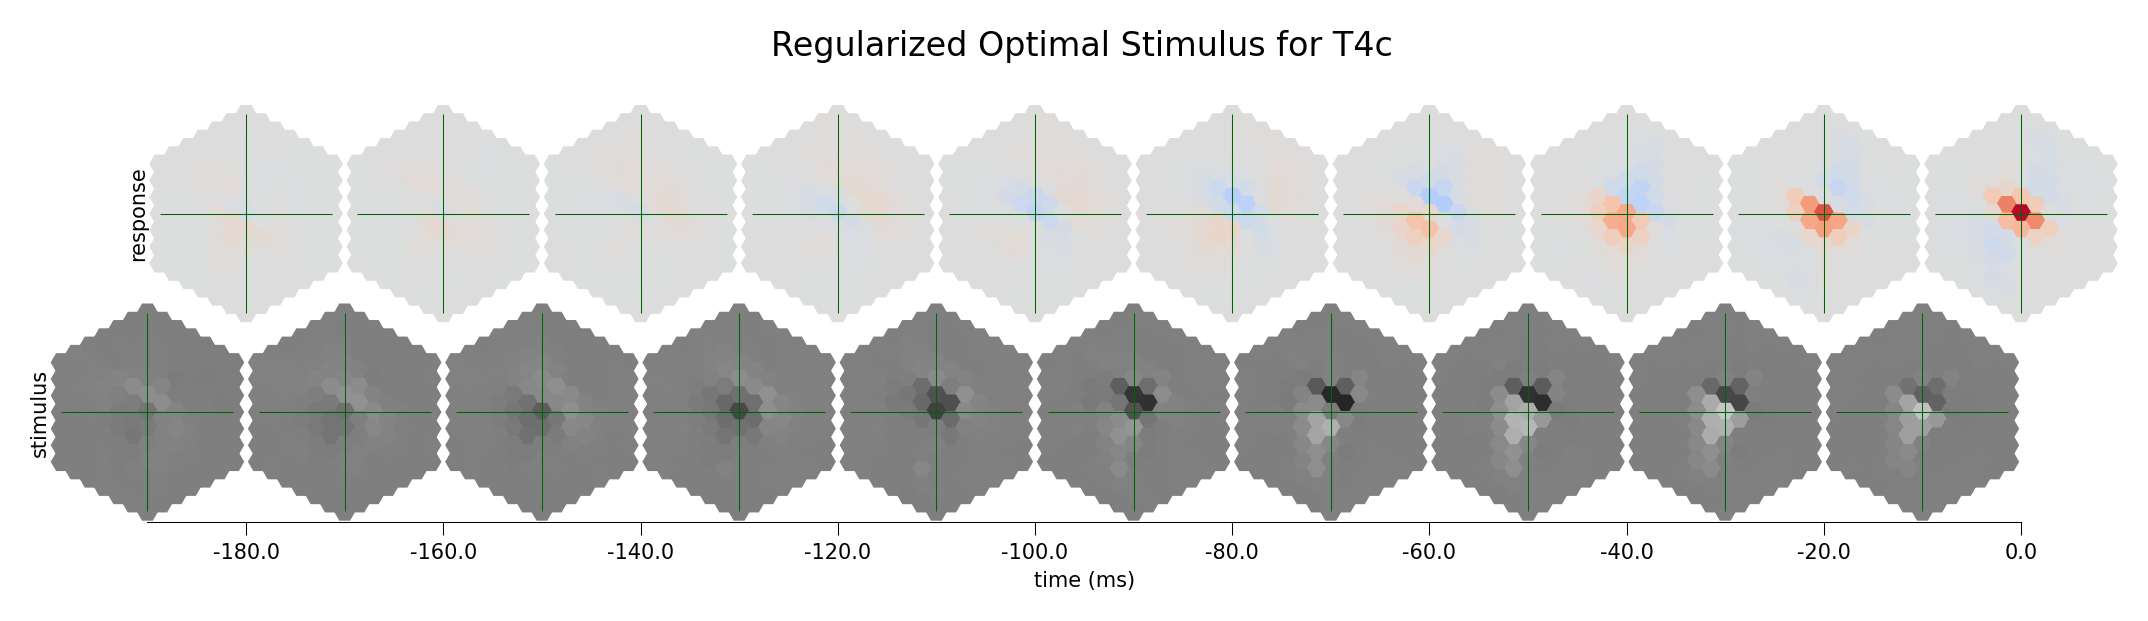

In [8]:
# Plot the regularized optimal stimulus
stim_resp_plot = plot_stim_response(
    optstim.regularized_stimulus,
    optstim.response,
    1 / 100,
    *network_view.connectome_view.get_uv(target_cell_type),
    figsize=[8, 3],
    label_peak_response=True,
)

plt.gcf().suptitle(f"Regularized Optimal Stimulus for {target_cell_type}", fontsize=8, y=0.8)

### Comparing Responses

Let's verify that the regularized stimulus produces the same response as the original:

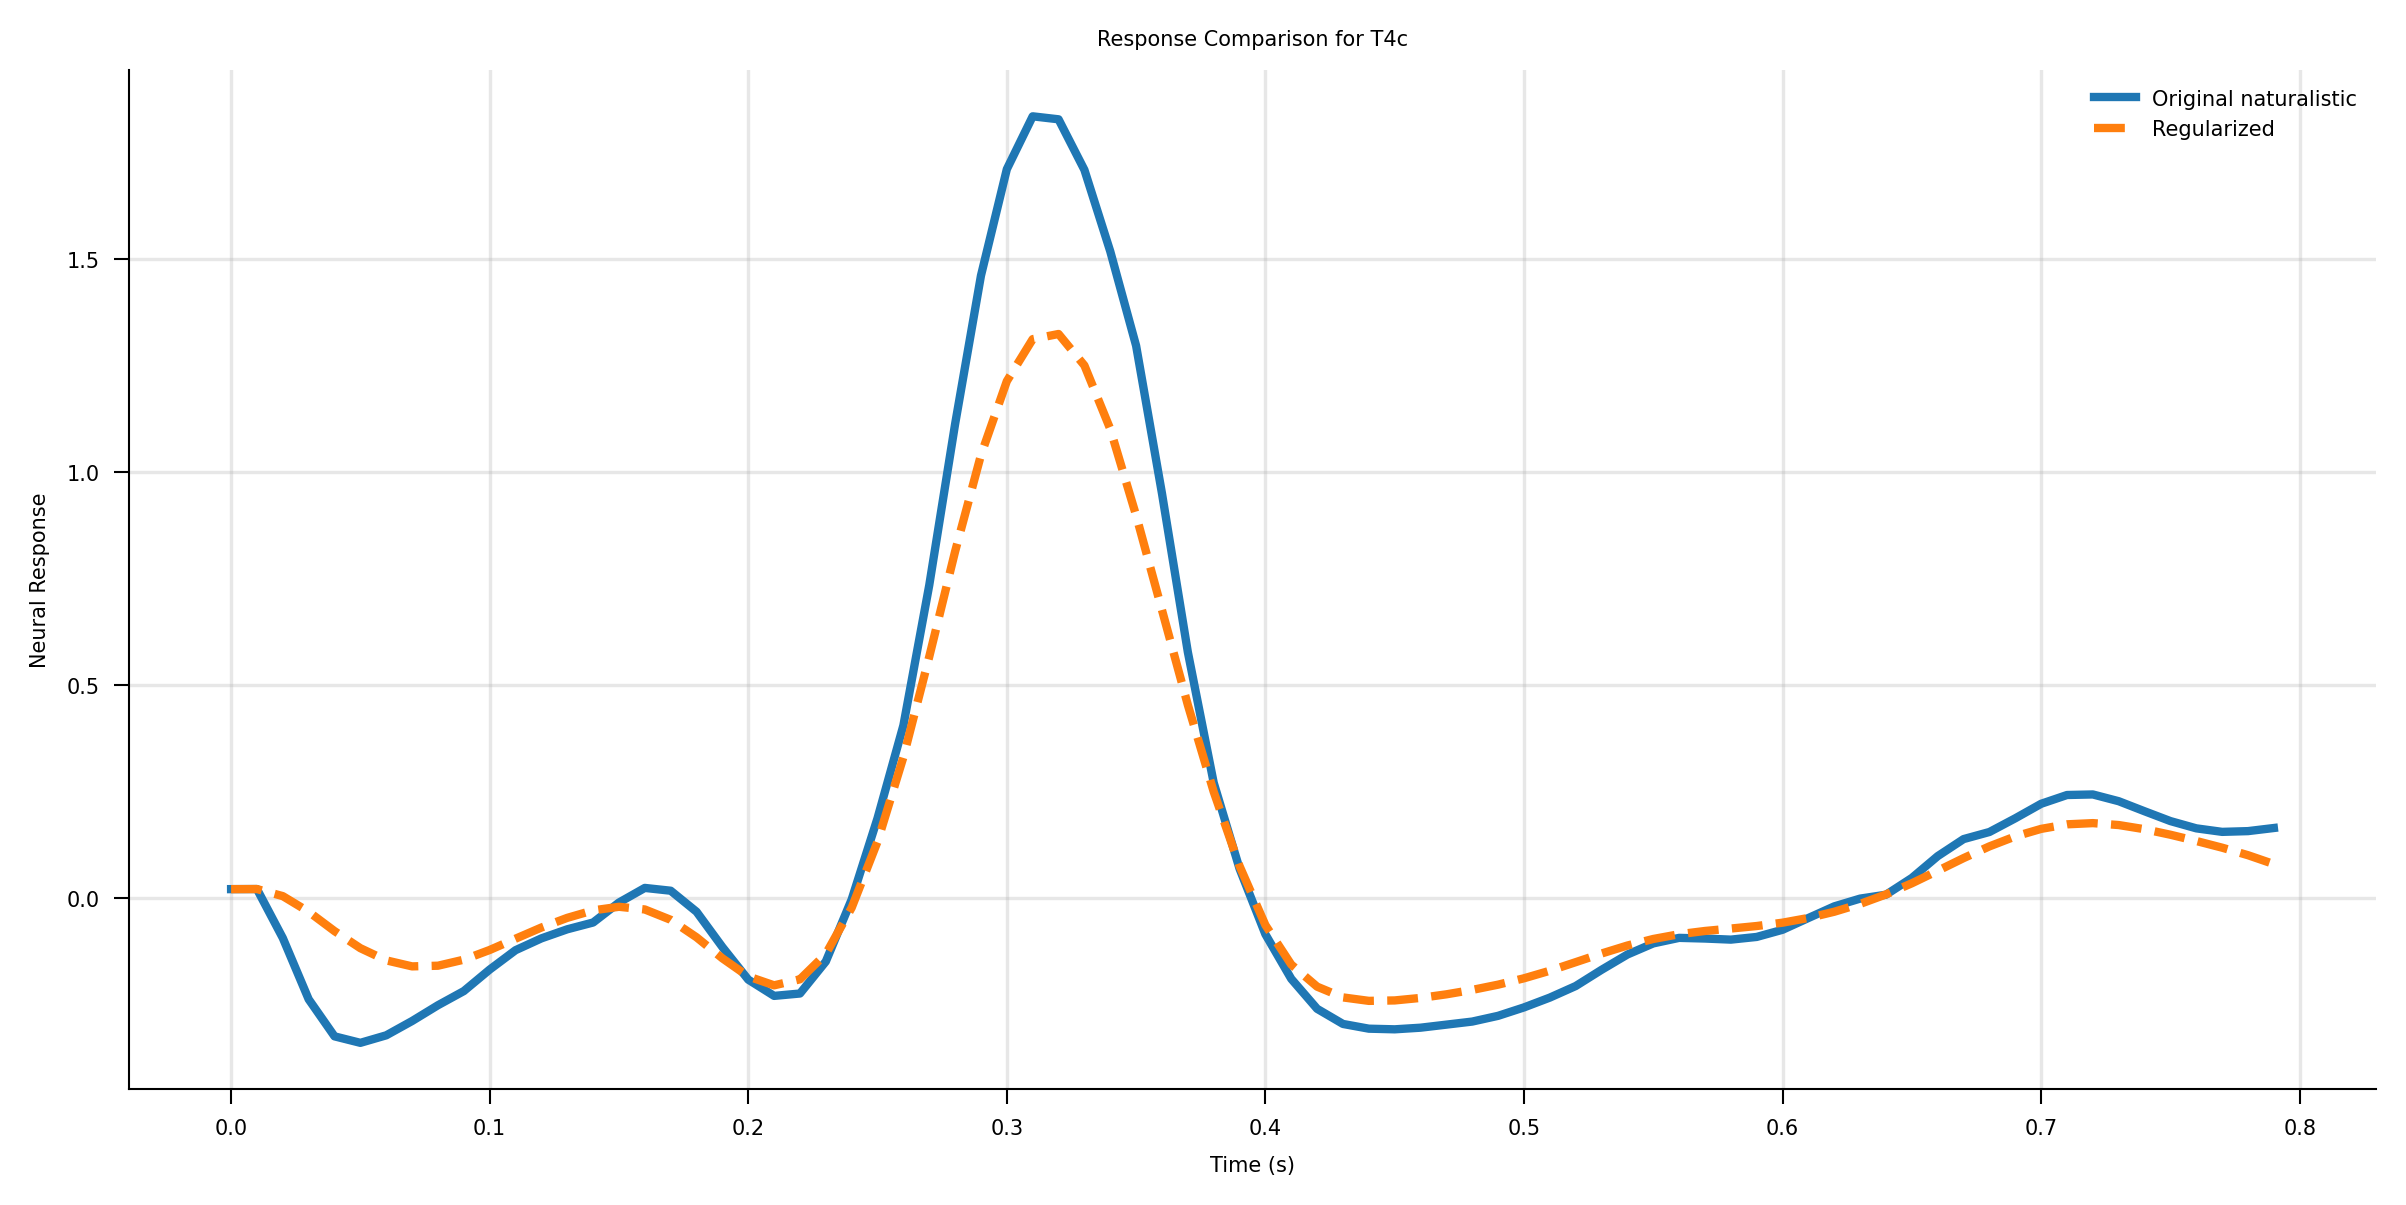

Correlation between original and regularized responses: 0.995


In [9]:
# Compare the neural responses
fig, ax = plt.subplots(figsize=(8, 4))

time = np.arange(len(optstim.central_target_response)) / 100
ax.plot(time, optstim.central_target_response, label='Original naturalistic', linewidth=2)
ax.plot(time, optstim.central_predicted_response, label='Regularized', linewidth=2, linestyle='--')

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neural Response")
ax.set_title(f"Response Comparison for {target_cell_type}")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation between responses
correlation = np.corrcoef(optstim.central_target_response, optstim.central_predicted_response)[0, 1]
print(f"Correlation between original and regularized responses: {correlation:.3f}")

### 🤔 Discussion Questions

1. How does the regularized stimulus differ from the original?
2. What does this tell us about which features are important for driving T4c responses?
3. Why might the regularized stimulus be more useful in neuroscience research?

## Part 4: Generating artificial optimal stimuli

Now let's generate an optimal stimulus completely from scratch using gradient-based optimization:

In [10]:
# Create stimulus generator
genoptstim = GenerateOptimalStimuli(network_view)

# Generate artificial optimal stimulus
print(f"Generating artificial optimal stimulus for {target_cell_type}...")
artoptstim = genoptstim.artificial_optimal_stimuli(target_cell_type, t_stim=0.8)

print("Generation complete!")

[2025-06-19 11:49:48] chkpt_utils:36 Recovered network state.


Generating artificial optimal stimulus for T4c...


Generation complete!


Text(0.5, 0.8, 'Artificial Optimal Stimulus for T4c')

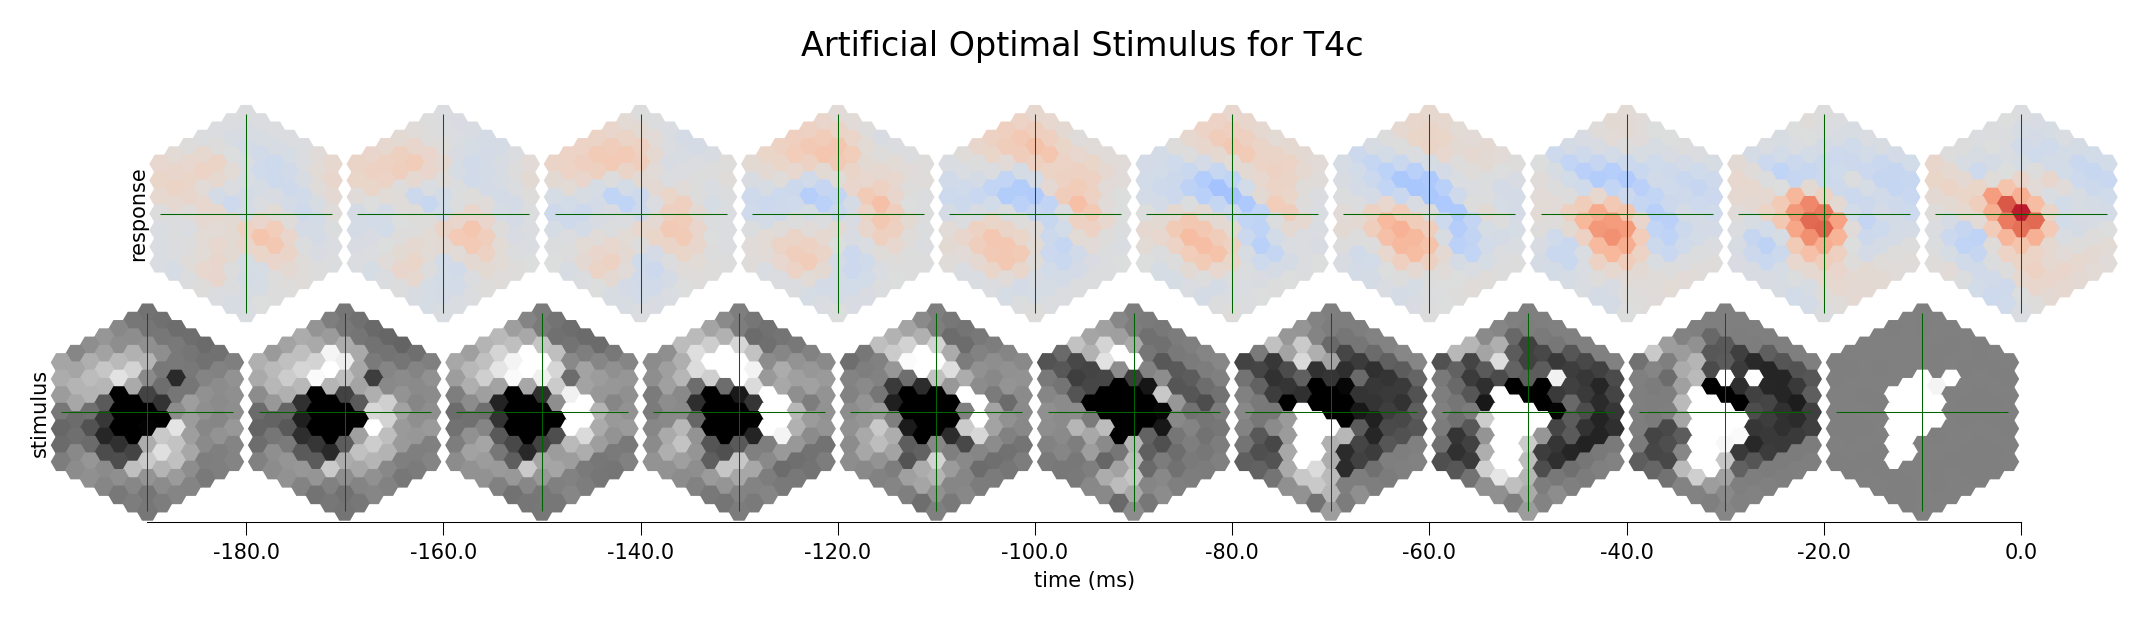

In [11]:
# Plot the artificial optimal stimulus
stim_resp_plot = plot_stim_response(
    artoptstim.stimulus,
    artoptstim.response,
    1 / 100,
    *network_view.connectome_view.get_uv(target_cell_type),
    figsize=[8, 3],
    label_peak_response=True,
)

plt.gcf().suptitle(f"Artificial Optimal Stimulus for {target_cell_type}", fontsize=8, y=0.8)

## Part 5: Comparing All Three Stimulus Types

Let's compare the neural responses evoked by all three types of optimal stimuli:

In [12]:
def plot_ms_before_peak(response, dt, seconds_before, ax, seconds_after=0.1, **plot_kwargs):
    """
    Plot response aligned to peak time.
    
    Parameters:
    - response: 1D array or 2D array (will take central column if 2D)
    - dt: time step in seconds
    - seconds_before: seconds to show before peak
    - seconds_after: seconds to show after peak (default 0.1)
    - **plot_kwargs: additional kwargs passed to plt.plot()
    
    Returns:
    - peak_time: original peak time in seconds
    - peak_idx: original peak index
    """
    # Handle 2D response by taking central column
    if response.ndim > 1:
        response_1d = response[:, response.shape[-1] // 2].flatten()
    else:
        response_1d = response.flatten()
    
    # Find peak
    argmax = np.nanargmax(response_1d)
    n_frames = len(response_1d)
    time = np.arange(n_frames) * dt
    t_argmax = time[argmax]
    
    # Calculate window around peak
    steps_before = int(seconds_before / dt)
    steps_after = int(seconds_after / dt)
    
    start_idx = max(0, argmax - steps_before)
    end_idx = min(n_frames, argmax + steps_after)
    
    # Extract window
    window = response_1d[start_idx:end_idx]
    window_time = np.arange(len(window)) * dt - seconds_before
    
    # Plot
    ax.plot(window_time, window, **plot_kwargs)
    
    return t_argmax, argmax

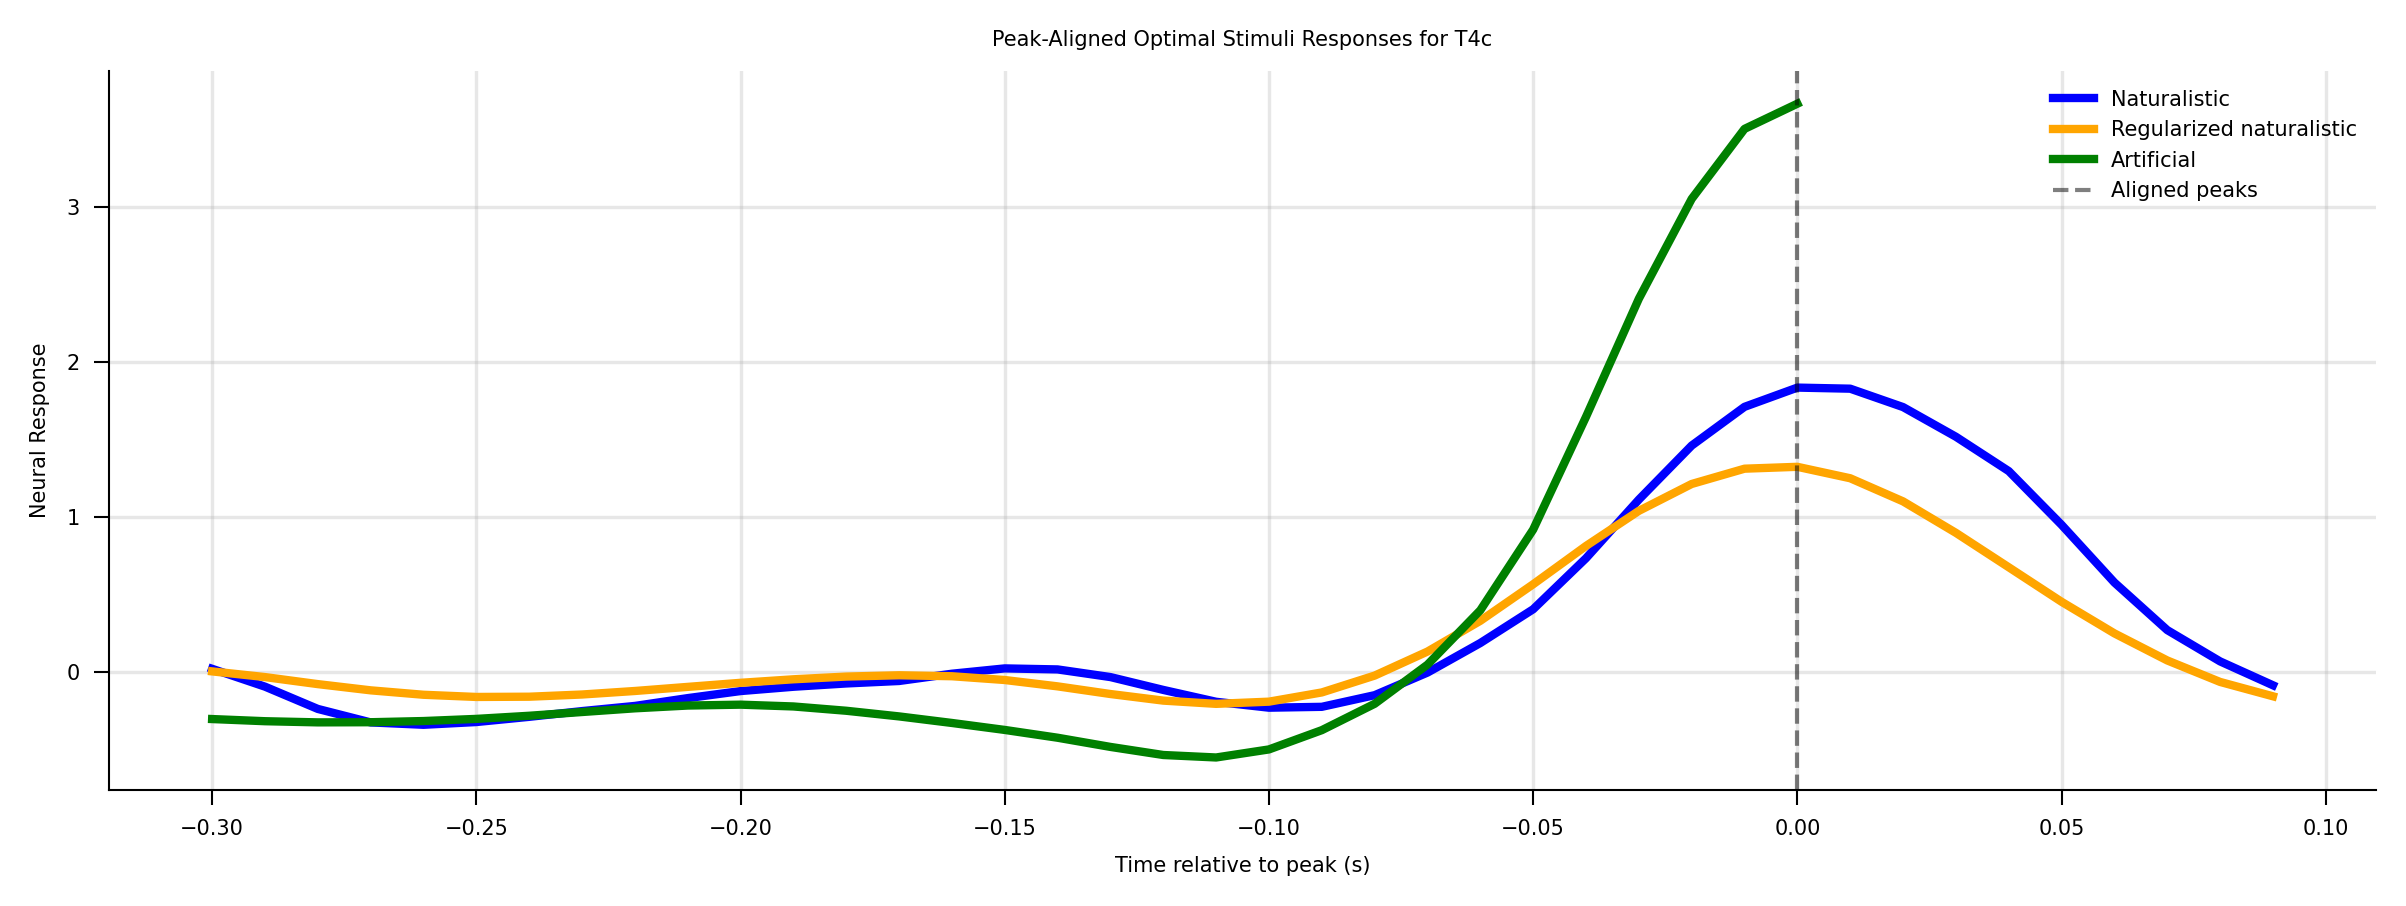

Peak values:
Naturalistic: 1.835
Regularized:  1.324
Artificial:   3.666


In [13]:
# Compare all responses aligned to peak
fig, ax = plt.subplots(figsize=(8, 3))

dt = 1/100  # 100 Hz sampling rate
seconds_before = 0.3  # 300 ms before peak
seconds_after = 0.1   # 100 ms after peak

# Plot each response with different styling
nat_peak_time, nat_peak_idx = plot_ms_before_peak(
    optstim.central_target_response, dt, seconds_before, ax,
    seconds_after=seconds_after, label='Naturalistic', linewidth=2, color='blue'
)

reg_peak_time, reg_peak_idx = plot_ms_before_peak(
    optstim.central_predicted_response, dt, seconds_before, ax,
    seconds_after=seconds_after, label='Regularized naturalistic', linewidth=2, color='orange'
)

artificial_response = artoptstim.response[:, :, artoptstim.response.shape[-1] // 2].flatten()
art_peak_time, art_peak_idx = plot_ms_before_peak(
    artificial_response, dt, seconds_before, ax,
    seconds_after=seconds_after, label='Artificial', linewidth=2, color='green'
)

# Add vertical line at peak (t=0)
ax.axvline(x=0, color='black', linestyle='--', alpha=0.5, label='Aligned peaks')

ax.set_xlabel("Time relative to peak (s)")
ax.set_ylabel("Neural Response")
ax.set_title(f"Peak-Aligned Optimal Stimuli Responses for {target_cell_type}")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print peak information
print("Peak values:")
print(f"Naturalistic: {np.max(optstim.central_target_response.numpy()):.3f}")
print(f"Regularized:  {np.max(optstim.central_predicted_response.numpy()):.3f}")
print(f"Artificial:   {np.max(artificial_response):.3f}")

## Part 6: Exploring different cell types

Let's try this analysis with a different cell type to see how the optimal stimuli differ:

Analyzing optimal stimuli for T5c...
/home/lappalainenj@hhmi.org/flysim_tutorials/.venv/lib/python3.13/site-packages/flyvis/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_optimal_stimulus_responses/6ee9a38d81522036f7ab50d524081ec0/output.h5


Text(0.5, 0.8, 'Regularized Optimal Stimulus for T5c')

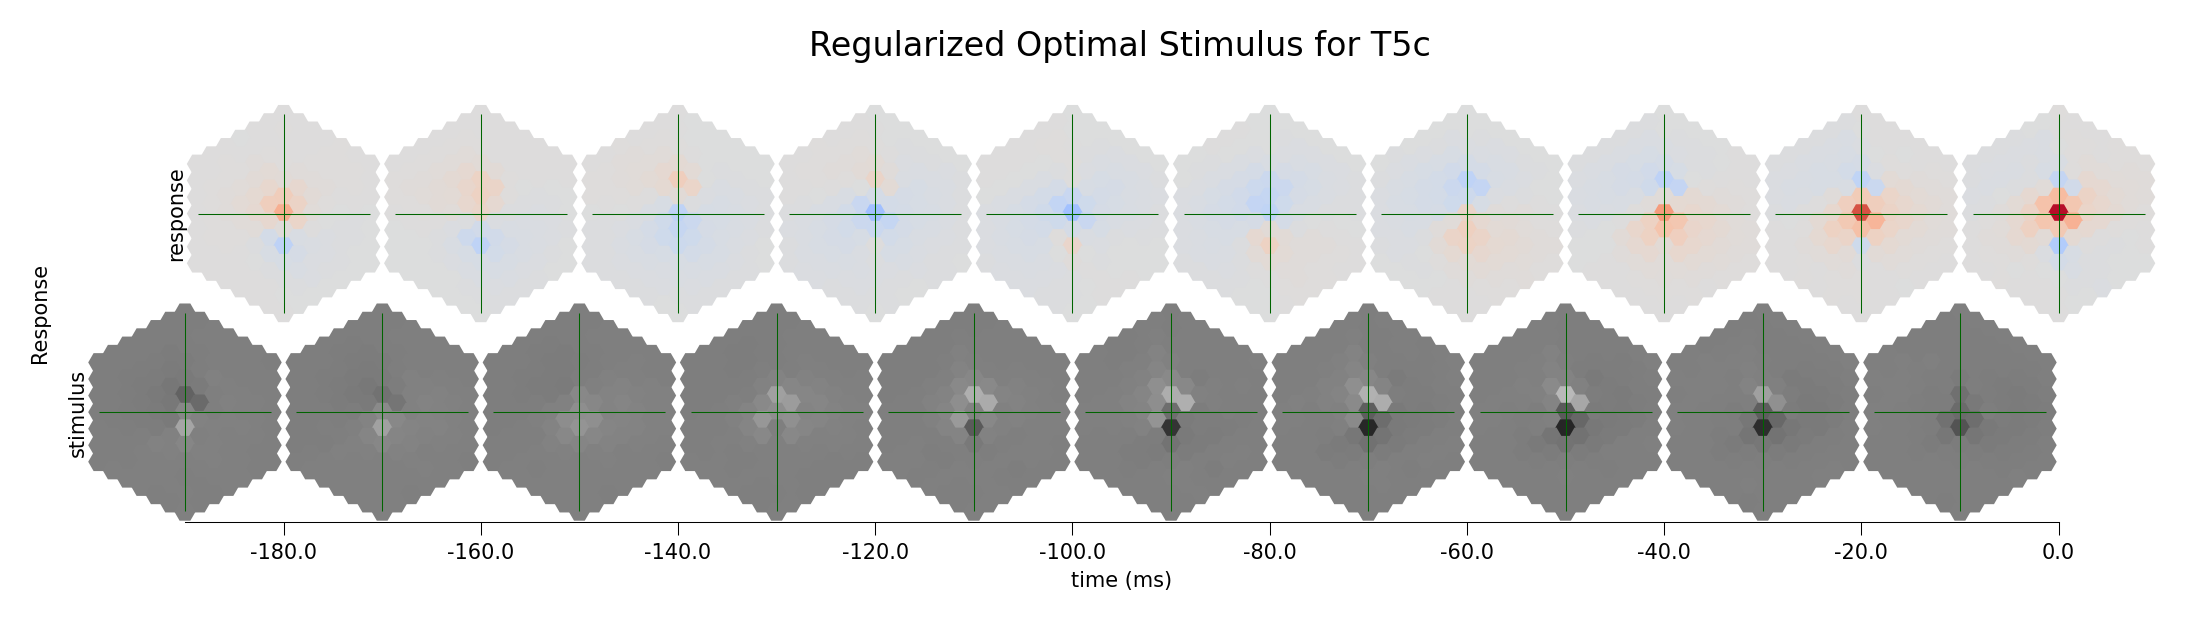

In [14]:
# Try with a different cell type
target_cell_type_2 = "T5c"  # T5c responds to OFF edges moving upward

print(f"Analyzing optimal stimuli for {target_cell_type_2}...")

# Get optimal stimulus responses for T5c
optstim_t5c = network_view.optimal_stimulus_responses(target_cell_type_2)

# Plot regularized stimulus for T5c
stim_resp_plot = plot_stim_response(
    optstim_t5c.regularized_stimulus,
    optstim_t5c.response,
    1 / 100,
    *network_view.connectome_view.get_uv(target_cell_type_2),
    figsize=[8, 3],
    ylabel="Response",
    label_peak_response=True,
)

plt.gcf().suptitle(f"Regularized Optimal Stimulus for {target_cell_type_2}", fontsize=8, y=0.8)

### 🤔 Discussion Questions

1. How does the optimal stimulus for T5c differ from T4c?
2. What does this tell us about the functional differences between these cell types?
3. What are the advantages and disadvantages of each stimulus type for neuroscience research?
4. Which stimulus type (naturalistic, regularized, or artificial) gives the strongest response?
5. What would be other interesting objectives to use for the artificial stimulus design? 

## Part 7: Hands-on exercise

Now it's your turn! Choose a different cell type and analyze its optimal stimuli:

In [15]:
# Exercise: Choose your own cell type to analyze
# Available cell types: L1, L2, L3, L4, L5, Mi1, Tm3, Mi4, Mi9, CT1(M10), 
#                      T4a, T4b, T4c, T4d, T5a, T5b, T5c, T5d, Tm1, Tm2, Tm4, Tm9, etc.

your_cell_type = "Mi1"  # Change this to your chosen cell type

# Your code here:
# 1. Get optimal stimulus responses for your chosen cell type
# 2. Plot the regularized optimal stimulus
# 3. Generate an artificial optimal stimulus
# 4. Compare the responses

# Hint: Follow the same pattern as above but replace the cell type

## Summary

In this tutorial, you've learned to:

1. **Load and work with neural network models** of the fly visual system
2. **Find optimal naturalistic stimuli** from datasets of natural scenes
3. **Create regularized stimuli** that maintain neural responses while removing unnecessary details
4. **Generate artificial optimal stimuli** using gradient-based optimization
5. **Compare different stimulus types** and their effectiveness

### Key Insights

- Different cell types respond optimally to different visual features
- Regularization can reveal the essential features driving neural responses
- Artificial stimuli can sometimes evoke stronger responses than natural stimuli
- These techniques are powerful tools for understanding neural computation

### Next Steps

In the next tutorial, we'll explore how to discover mechanisms in neural networks through dimensionality reduction and clustering techniques.

## Project guiding ideas

### Idea 1: Optimal deep stimulus design

**Goal**: Generate stimuli for model and hypothesis refinement in the context of competing hypotheses from models of an ensemble.

**Background on ensembles**:  
flyvis provides access to a trained ensemble of neural network models. 
An ensemble contains several independently trained models that can exhibit different behaviors despite being trained on the same task. 

This variability arise from:
- Different random weight initializations
- Stochastic training 
- Different local minima in the optimization landscape

**Guiding questions**:
- How do optimal stimuli change across different network models within an ensemble?
- Which stimulus best separates the responses of two specific models?
- Which stimulus maximally separates clusters of models with similar behaviors?

```python
# Example: Load multiple models from an ensemble
model_1 = NetworkView("flow/0000/000")  # First model
model_2 = NetworkView("flow/0000/001")  # Second model  
# or equivalent
ensemble = EnsembleView("flow/0000)
model_1 = ensemble[0]
model_2 = ensemble[1]

# Compare optimal stimuli across models
# Generate stimuli that maximize differences between models
```

### Idea 2: Deep illusion design

**Goal**: Generate illusion stimuli that deceive the network while maintaining specific aspects of their appearance.

**Background**:  
Just like biological visual systems can be fooled by optical illusions, neural network models can also be susceptible to illusory stimuli.  
This project explores creating stimuli that maintain one perceptual property while disrupting another.

**Guiding questions**:
- Train a decoder to detect looming stimuli from model responses
- What regularization techniques can maintain the looming outline while breaking detection?
- What specific features create illusions for the network?
- How do illusion susceptibilities differ across ensemble models?

**Potential Approaches**:
```python
# Example framework for illusion design
# 1. Train a looming detector on model responses
# 2. Generate stimuli that look like looming but fool the detector
# 3. Analyze which visual features are responsible for the illusion
# 4. Compare illusion effectiveness across ensemble models
```

## Supporting references

**General:**

Flyvis Documentation. https://turagalab.github.io/flyvis/.  
Lappalainen, J. K. et al. Connectome-constrained networks predict neural activity across the fly visual system. Nature 634, 1132–1140 (2024).  

**Project Idea 1:**

Burg, M. F. et al. Most discriminative stimuli for functional cell type clustering. ArXiv arXiv:2401.05342v2 (2024).

**Project Idea 2:**

Bach, M. Reverse Phi Illusion. https://michaelbach.de/ot/mot-reversePhi/.  
Salem, W., Cellini, B., Frye, M. A. & Mongeau, J.-M. Fly eyes are not still: a motion illusion in Drosophila flight supports parallel visual processing. J. Exp. Biol. 223, jeb212316 (2020).   
Card, G. & Dickinson, M. H. Visually mediated motor planning in the escape response of Drosophila. Curr. Biol. 18, 1300–1307 (2008).  